In [1]:
import folium
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import box
import numpy as np

In [2]:
import matplotlib.font_manager as fm

# 한국어 출력을 위한 폰트 설정
plt.rc('font', family='NanumGothic') 

# 마이너스 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 데이터 불러오기
pop = gpd.read_file("data/(B100)국토통계_인구정보-총 인구 수(전체)-(격자) 500M_서울특별시_202310/nlsp_030001001.shp", encoding='utf-8')
pop_ele = gpd.read_file("data/(B100)국토통계_인구정보-초등학생 인구 수(전체)-(격자) 500M_서울특별시_202310/nlsp_030001016.shp", encoding='utf-8')
pop_old = gpd.read_file("data/(B100)국토통계_인구정보-고령 인구 수(전체)-(격자) 500M_서울특별시_202310/nlsp_030001010.shp", encoding='utf-8')
building_base = gpd.read_file("data/(B100)국토통계_건축물-지하층수-(격자) 500M_서울특별시_202312/nlsp_030002012.shp", encoding='utf-8')
building_street = gpd.read_file("data/(B100)국토통계_건축물-지상층수-(격자) 500M_서울특별시_202312/nlsp_030002011.shp", encoding='utf-8')
building_num_detached = gpd.read_file("data/(B100)국토통계_건축물-주거용건물 용도별 건축물 수(단독)-(격자) 500M_서울특별시_202312/nlsp_030002022.shp", encoding='utf-8')
building_num_common = gpd.read_file("data/(B100)국토통계_건축물-주거용건물 용도별 건축물 수(공동)-(격자) 500M_서울특별시_202312/nlsp_030002023.shp", encoding='utf-8')
floor_area_ratio = gpd.read_file("data/(B100)국토통계_건축물-용적율-(격자) 500M_서울특별시_202312/nlsp_030002010.shp", encoding='utf-8')
building_age_over_35 = gpd.read_file("data/(B100)국토통계_건축물-시기별 건축물 수(35년 이상)-(격자) 500M_서울특별시_202312/nlsp_030002020.shp", encoding='utf-8')
building_age_25_30 = gpd.read_file("data/(B100)국토통계_건축물-시기별 건축물 수(25년 이상 30년 미만)-(격자) 500M_서울특별시_202312/nlsp_030002018.shp", encoding='utf-8')
building_age_20_25 = gpd.read_file("data/(B100)국토통계_건축물-시기별 건축물 수(20년 이상 25년 미만)-(격자) 500M_서울특별시_202312/nlsp_030002017.shp", encoding='utf-8')
building_age_15_20 = gpd.read_file("data/(B100)국토통계_건축물-시기별 건축물 수(15년 이상 20년 미만)-(격자) 500M_서울특별시_202312/nlsp_030002016.shp", encoding='utf-8')
building_age_10_15 = gpd.read_file("data/(B100)국토통계_건축물-시기별 건축물 수(10년 이상 15년 미만)-(격자) 500M_서울특별시_202312/nlsp_030002015.shp", encoding='utf-8')
building_age_under_10 = gpd.read_file("data/(B100)국토통계_건축물-시기별 건축물 수(10년 미만)-(격자) 500M_서울특별시_202312/nlsp_030002014.shp", encoding='utf-8')
building_using_approval = gpd.read_file("data/(B100)국토통계_건축물-사용승인일-(격자) 500M_서울특별시_202312/nlsp_030002001.shp", encoding='utf-8')
building_height = gpd.read_file("data/(B100)국토통계_건축물-높이-(격자) 500M_서울특별시_202312/nlsp_030002013.shp", encoding='utf-8')
building_num = gpd.read_file("data/(B100)국토통계_건축물-건축물 수 합계 통계-(격자) 500M_서울특별시_202312/nlsp_030002021.shp", encoding='utf-8')
building_area = gpd.read_file("data/(B100)국토통계_건축물-건축면적-(격자) 500M_서울특별시_202312/nlsp_030002008.shp", encoding='utf-8')
residential_area = gpd.read_file("data/(B100)국토통계_개별주택-주거용도면적-(격자) 500M_서울특별시_202206/nlsp_030005004.shp", encoding='utf-8')

In [16]:
# 각 데이터의 헤드 출력
# pop 데이터의 헤드 출력
# print("pop head:")
# print(pop.head())

# pop_ele 데이터의 헤드 출력
# print("\npop_ele head:")
# print(pop_ele.head())

# pop_old 데이터의 헤드 출력
# print("\npop_old head:")
# print(pop_old.head())

# building_base 데이터의 헤드 출력
# print("\nbuilding_base head:")
# print(building_base.head())

# building_street 데이터의 헤드 출력
# print("\nbuilding_street head:")
# print(building_street.head())

# building_num_detached 데이터의 헤드 출력
# print("\nbuilding_num_detached head:")
# print(building_num_detached.head())

# building_num_common 데이터의 헤드 출력
# print("\nbuilding_num_common head:")
# print(building_num_common.head())

# floor_area_ratio 데이터의 헤드 출력
# print("\nfloor_area_ratio head:")
# print(floor_area_ratio.head())

# building_age_over_35 데이터의 헤드 출력
# print("\nbuilding_age_over_35 head:")
# print(building_age_over_35.head())

# building_age_25_30 데이터의 헤드 출력
# print("\nbuilding_age_25_30 head:")
# print(building_age_25_30.head())

# building_age_20_25 데이터의 헤드 출력
# print("\nbuilding_age_20_25 head:")
# print(building_age_20_25.head())

# building_age_15_20 데이터의 헤드 출력
# print("\nbuilding_age_15_20 head:")
# print(building_age_15_20.head())

# building_age_10_15 데이터의 헤드 출력
# print("\nbuilding_age_10_15 head:")
# print(building_age_10_15.head())

# building_age_under_10 데이터의 헤드 출력
# print("\nbuilding_age_under_10 head:")
# print(building_age_under_10.head())

# building_using_approval 데이터의 헤드 출력
# print("\nbuilding_using_approval head:")
# print(building_using_approval.head())

# building_height 데이터의 헤드 출력
# print("\nbuilding_height head:")
# print(building_height.head())

# building_num 데이터의 헤드 출력
# print("\nbuilding_num head:")
# print(building_num.head())

# building_area 데이터의 헤드 출력
# print("\nbuilding_area head:")
# print(building_area.head())

# residential_area 데이터의 헤드 출력
# print("\nresidential_area head:")
residential_area

,gid,lbl,val,geometry
0,다사60b48a,197.38,197.38,"POLYGON ((960500.000 1948000.000, 960500.000 1..."
1,다사67b48b,208.22,208.22,"POLYGON ((967500.000 1948500.000, 967500.000 1..."
2,다사47a39a,183.03,183.03,"POLYGON ((947000.000 1939000.000, 947000.000 1..."
3,다사53b48b,84.47,84.47,"POLYGON ((953500.000 1948500.000, 953500.000 1..."
4,다사51a54b,138.63,138.63,"POLYGON ((951000.000 1954500.000, 951000.000 1..."
...,...,...,...,...
2629,다사66a57a,None,NaN,"POLYGON ((966000.000 1957000.000, 966000.000 1..."
2630,다사49b38b,None,NaN,"POLYGON ((949500.000 1938500.000, 949500.000 1..."
2631,다사58b41a,None,NaN,"POLYGON ((958500.000 1941000.000, 958500.000 1..."
2632,다사50b37b,None,NaN,"POLYGON ((950500.000 1937500.000, 950500.000 1..."


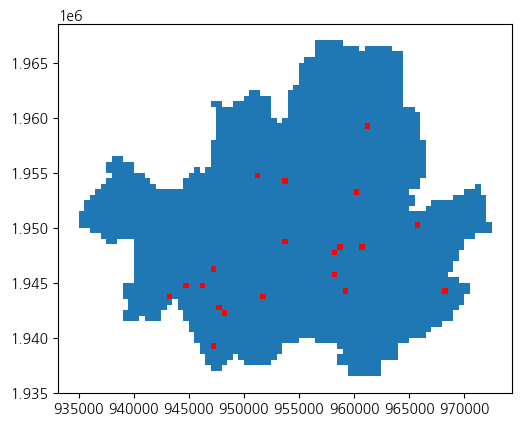

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# pop GeoDataFrame에서 처음부터 20행 선택
first_20_rows = pop.iloc[:20]

# pop 전체를 plot
ax = pop.plot()

# 처음부터 20행까지 색칠
first_20_rows.plot(ax=ax, color='red')

# 그래픽 표시
plt.show()

In [20]:
# 데이터프레임에서 'lbl' 열 제거
pop.drop(columns=['lbl'], inplace=True)
pop_ele.drop(columns=['lbl'], inplace=True)
pop_old.drop(columns=['lbl'], inplace=True)
building_base.drop(columns=['lbl'], inplace=True)
building_street.drop(columns=['lbl'], inplace=True)
building_num_detached.drop(columns=['lbl'], inplace=True)
building_num_common.drop(columns=['lbl'], inplace=True)
floor_area_ratio.drop(columns=['lbl'], inplace=True)
building_age_over_35.drop(columns=['lbl'], inplace=True)
building_age_25_30.drop(columns=['lbl'], inplace=True)
building_age_20_25.drop(columns=['lbl'], inplace=True)
building_age_15_20.drop(columns=['lbl'], inplace=True)
building_age_10_15.drop(columns=['lbl'], inplace=True)
building_age_under_10.drop(columns=['lbl'], inplace=True)
building_using_approval.drop(columns=['lbl'], inplace=True)
building_height.drop(columns=['lbl'], inplace=True)
building_num.drop(columns=['lbl'], inplace=True)
building_area.drop(columns=['lbl'], inplace=True)
residential_area.drop(columns=['lbl'], inplace=True)

In [21]:
# 각 데이터프레임에 적용할 새로운 열 이름 딕셔너리
new_column_names = {
    "pop": "pop",
    "pop_ele": "pop_ele",
    "pop_old": "pop_old",
    "building_base": "building_base",
    "building_street": "building_street",
    "building_num_detached": "building_num_detached",
    "building_num_common": "building_num_common",
    "floor_area_ratio": "floor_area_ratio",
    "building_age_over_35": "building_age_over_35",
    "building_age_25_30": "building_age_25_30",
    "building_age_20_25": "building_age_20_25",
    "building_age_15_20": "building_age_15_20",
    "building_age_10_15": "building_age_10_15",
    "building_age_under_10": "building_age_under_10",
    "building_using_approval": "building_using_approval",
    "building_height": "building_height",
    "building_num": "building_num",
    "building_area": "building_area",
    "residential_area": "residential_area"
}

# 각 데이터프레임에서 'val' 열을 다른 이름으로 변경
for df_name, new_name in new_column_names.items():
    globals()[df_name].rename(columns={'val': new_name}, inplace=True)

In [22]:
import geopandas as gpd

# 데이터프레임을 리스트에 저장
dfs = [
    pop, pop_ele, pop_old, building_base, building_street,
    building_num_detached, building_num_common, floor_area_ratio,
    building_age_over_35, building_age_25_30, building_age_20_25,
    building_age_15_20, building_age_10_15, building_age_under_10,
    building_using_approval, building_height, building_num,
    building_area, residential_area
]

# 첫 번째 데이터프레임을 기준으로 모든 데이터프레임을 병합
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = merged_df.join(df.set_index('gid'), on='gid', rsuffix='_right')

# 결과 확인
# print(merged_df.head())

In [23]:
# 모든 geometry_right 열 제거
merged_df = merged_df.drop(columns=[col for col in merged_df.columns if 'geometry_right' in col])

# 결과 확인
merged_df.head()

,gid,pop,geometry,pop_ele,pop_old,building_base,building_street,building_num_detached,building_num_common,floor_area_ratio,...,building_age_25_30,building_age_20_25,building_age_15_20,building_age_10_15,building_age_under_10,building_using_approval,building_height,building_num,building_area,residential_area
0,다사60b48a,400.0,"POLYGON ((960500.000 1948000.000, 960500.000 1...",10.0,87.0,1.00,2.49,27.0,4.0,141.47,...,3.0,1.0,NaN,NaN,NaN,1986.32,10.63,41.0,120.74,197.38
1,다사58b48a,3397.0,"POLYGON ((958500.000 1948000.000, 958500.000 1...",251.0,677.0,1.06,5.84,NaN,14.0,19.04,...,4.0,1.0,NaN,NaN,1.0,1983.96,23.03,31.0,671.39,NaN
2,다사44b44b,278.0,"POLYGON ((944500.000 1944500.000, 944500.000 1...",25.0,30.0,1.33,4.07,NaN,3.0,133.97,...,8.0,1.0,3.0,3.0,6.0,1995.47,20.47,43.0,2345.67,NaN
3,다사47a39a,5350.0,"POLYGON ((947000.000 1939000.000, 947000.000 1...",124.0,1251.0,1.03,3.00,380.0,88.0,151.09,...,31.0,32.0,16.0,36.0,75.0,1991.07,11.70,651.0,128.58,183.03
4,다사53b54a,65.0,"POLYGON ((953500.000 1954000.000, 953500.000 1...",9.0,0.0,1.00,3.00,1.0,NaN,22.90,...,NaN,NaN,NaN,NaN,NaN,1982.00,10.80,1.0,662.79,NaN


In [24]:
# 'gid' 열의 이름을 'id'로 변경
merged_df.rename(columns={'gid': 'id'}, inplace=True)

# 'id' 열에 1부터 시작하는 순차적인 숫자 할당
merged_df['id'] = range(1, len(merged_df) + 1)

# 결과 확인
print(merged_df[['id', 'pop']].head())

   id     pop
0   1   400.0
1   2  3397.0
2   3   278.0
3   4  5350.0
4   5    65.0


In [25]:
merged_df.columns

Index(['id', 'pop', 'geometry', 'pop_ele', 'pop_old', 'building_base',
       'building_street', 'building_num_detached', 'building_num_common',
       'floor_area_ratio', 'building_age_over_35', 'building_age_25_30',
       'building_age_20_25', 'building_age_15_20', 'building_age_10_15',
       'building_age_under_10', 'building_using_approval', 'building_height',
       'building_num', 'building_area', 'residential_area'],
      dtype='object')

In [30]:
# merged_df.to_file('seoul_geo.geojson', driver='GeoJSON', encoding='utf-8')

# 원본 열 이름을 단축하는 예시
short_names = {
    'building_base': 'bld_base',
    'building_street': 'bld_strt',
    'building_num_detached': 'bld_det',
    'building_num_common': 'bld_com',
    'floor_area_ratio': 'flr_ar_rt',
    'building_age_over_35': 'age_ov_35',
    'building_age_25_30': 'age_25_30',
    'building_age_20_25': 'age_20_25',
    'building_age_15_20': 'age_15_20',
    'building_age_10_15': 'age_10_15',
    'building_age_under_10': 'age_un_10',
    'building_using_approval': 'bld_use_ap',
    'building_height': 'bld_ht',
    'building_num': 'bld_num',
    'building_area': 'bld_area',
    'residential_area': 'res_area'
}

merged_df.rename(columns=short_names, inplace=True)

# 이제 단축된 열 이름으로 .shp 파일로 내보내기
merged_df.to_file('data/seoul_geo_short.shp')
